In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns

plt.style.use('science')

plt.rcParams["xtick.minor.visible"] =  False
plt.rcParams["ytick.minor.visible"] =  False
plt.rcParams['legend.frameon'] = True
# font.serif : Times
# font.family : serif
# mathtext.fontset : dejavuserif

# plt.rcParams['font.family'] = "serif"
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'


In [2]:
ns = catalog.load("detected_text")
ns.head()

                    INFO     Loading data from 'detected_text' (ParquetDataset)...              ]8;id=142731;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=443360;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,study_id,id,contrast_id,abstract,authors,journal,year,title,keywords,det_sentences
0,10022492,10022492-1,1,A fundamental characteristic of working memory...,"Callicott JH, Mattay VS, Bertolino A, Finn K, ...","Cerebral cortex (New York, N.Y. : 1991)",1999,Physiological characteristics of capacity cons...,"response, contrast",Loci within dorsolateral prefrontal cortex (DL...
1,10022494,10022494-1,1,Electrophysiological studies on monkeys have b...,"Toni I, Schluter ND, Josephs O, Friston K, Pas...","Cerebral cortex (New York, N.Y. : 1991)",1999,"Signal-, set- and movement-related activity in...","event, response",By systematically varying the interval between...
2,10022496,10022496-1,1,Most functional imaging studies of the auditor...,"Lockwood AH, Salvi RJ, Coad ML, Arnold SA, Wac...","Cerebral cortex (New York, N.Y. : 1991)",1999,The functional anatomy of the normal human aud...,"response, network",We used positron emission tomography to map ne...
3,10051677,10051677-1,1,Positron emission tomography studies were cond...,"Denton D, Shade R, Zamarippa F, Egan G, Blair-...",Proceedings of the National Academy of Science...,1999,Correlation of regional cerebral blood flow an...,correlation,The correlation of regional cerebral blood flo...
4,10191322,10191322-1,1,The cortical organization of language in bilin...,"Chee MW, Tan EW, Thiel T",The Journal of neuroscience : the official jou...,1999,Mandarin and English single word processing st...,contrast,Blood oxygen level-dependent contrast function...


In [3]:
pd.unique(ns['year'])


array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 1997, 1998])

In [4]:
from work.pipelines.project.nodes import load_methods_corpus

mtd = load_methods_corpus(catalog.load('methods_corpus'))
methods_words = list(mtd)
methods_words.sort()

[05/03/24 12:02:48] INFO     Loading data from 'methods_corpus' (TextDataset)...                ]8;id=511967;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=266513;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [5]:
def expand_methods_words(df, methods_words):

    kw = df['keywords'].str.split(',')

    # create indicator matrix
    v = np.empty(0, dtype=np.int8)
    compiled = {k:v for k in methods_words}

    for item in kw:
        for word in methods_words:
            if word in item:
                count = 1
            else:
                count = 0
            compiled[word] = np.append(compiled[word], count)
    
    # join with original dataset
    comp = pd.DataFrame(compiled)
    df = pd.concat([df, comp], axis=1)

    return df

    
ns = expand_methods_words(ns, methods_words)
ns.head()

,study_id,id,contrast_id,abstract,authors,journal,year,title,keywords,det_sentences,...,response,resting-state,seed-based,sensitivity,specificity,structural,tensor,test,voxel-wise,whole brain
0,10022492,10022492-1,1,A fundamental characteristic of working memory...,"Callicott JH, Mattay VS, Bertolino A, Finn K, ...","Cerebral cortex (New York, N.Y. : 1991)",1999,Physiological characteristics of capacity cons...,"response, contrast",Loci within dorsolateral prefrontal cortex (DL...,...,1,0,0,0,0,0,0,0,0,0
1,10022494,10022494-1,1,Electrophysiological studies on monkeys have b...,"Toni I, Schluter ND, Josephs O, Friston K, Pas...","Cerebral cortex (New York, N.Y. : 1991)",1999,"Signal-, set- and movement-related activity in...","event, response",By systematically varying the interval between...,...,0,0,0,0,0,0,0,0,0,0
2,10022496,10022496-1,1,Most functional imaging studies of the auditor...,"Lockwood AH, Salvi RJ, Coad ML, Arnold SA, Wac...","Cerebral cortex (New York, N.Y. : 1991)",1999,The functional anatomy of the normal human aud...,"response, network",We used positron emission tomography to map ne...,...,1,0,0,0,0,0,0,0,0,0
3,10051677,10051677-1,1,Positron emission tomography studies were cond...,"Denton D, Shade R, Zamarippa F, Egan G, Blair-...",Proceedings of the National Academy of Science...,1999,Correlation of regional cerebral blood flow an...,correlation,The correlation of regional cerebral blood flo...,...,0,0,0,0,0,0,0,0,0,0
4,10191322,10191322-1,1,The cortical organization of language in bilin...,"Chee MW, Tan EW, Thiel T",The Journal of neuroscience : the official jou...,1999,Mandarin and English single word processing st...,contrast,Blood oxygen level-dependent contrast function...,...,0,0,0,0,0,0,0,0,0,0


In [6]:
term_time_matrix = ns[['year'] + methods_words].groupby('year').sum()
# pd.concat([term_time_matrix], axis=1)

year_counts = ns[['year']].value_counts(ascending=True)
year_counts.index = term_time_matrix.index

norm_term_time = term_time_matrix.divide(year_counts, axis=0)


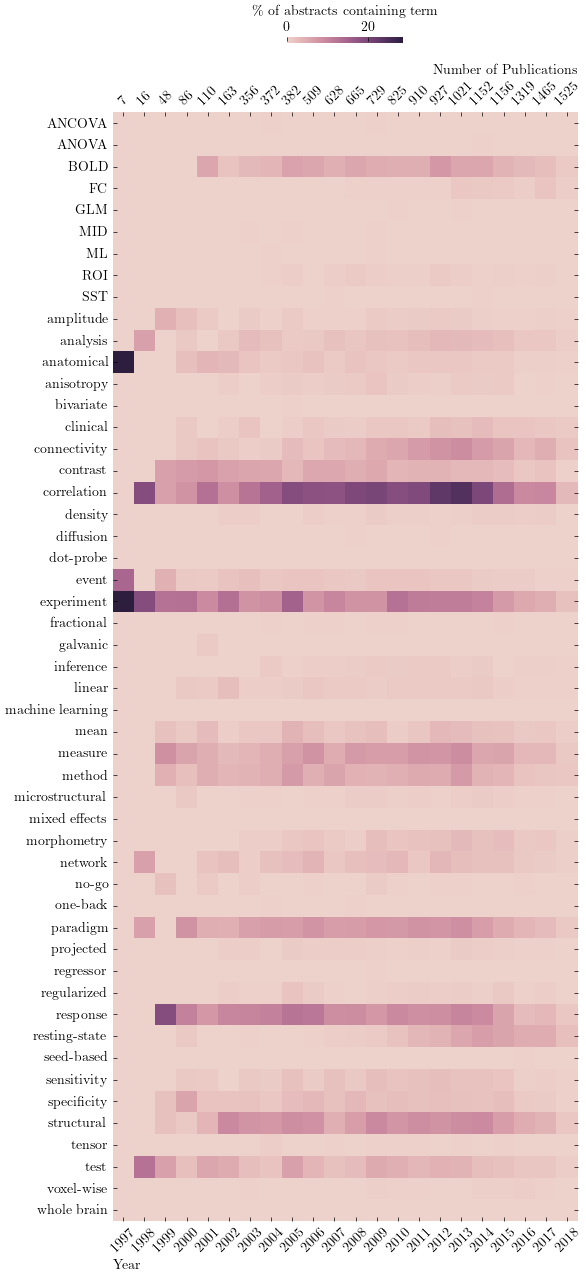

In [20]:
fig, ax = plt.subplots(figsize=(6, 18))   
sns.heatmap(
    norm_term_time.T * 100, 
    cmap=sns.cubehelix_palette(as_cmap=True),
    cbar_kws={'shrink': 0.25, 
              'location': 'top',
              'label': '\% of abstracts containing term'}, 
    ax=ax)
ax.tick_params(top=True, which='major')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Year', loc='left')

ax2 = ax.twiny() 

ax2.set_xlim([0,ax.get_xlim()[1]])
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(year_counts)
ax2.set_xlabel('Number of Publications', loc='right')
ax2.tick_params(rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.savefig('../data/08_reporting/project/terms_over_time.pdf')

In [49]:
comp = pd.DataFrame(compiled)
pd.concat([ns, comp], axis=1)

,study_id,id,contrast_id,abstract,authors,journal,year,title,keywords,det_sentences,...,response,resting-state,seed-based,sensitivity,specificity,structural,tensor,test,voxel-wise,whole brain
0,10022492,10022492-1,1,A fundamental characteristic of working memory...,"Callicott JH, Mattay VS, Bertolino A, Finn K, ...","Cerebral cortex (New York, N.Y. : 1991)",1999,Physiological characteristics of capacity cons...,"response, contrast",Loci within dorsolateral prefrontal cortex (DL...,...,1,0,0,0,0,0,0,0,0,0
1,10022494,10022494-1,1,Electrophysiological studies on monkeys have b...,"Toni I, Schluter ND, Josephs O, Friston K, Pas...","Cerebral cortex (New York, N.Y. : 1991)",1999,"Signal-, set- and movement-related activity in...","event, response",By systematically varying the interval between...,...,0,0,0,0,0,0,0,0,0,0
2,10022496,10022496-1,1,Most functional imaging studies of the auditor...,"Lockwood AH, Salvi RJ, Coad ML, Arnold SA, Wac...","Cerebral cortex (New York, N.Y. : 1991)",1999,The functional anatomy of the normal human aud...,"response, network",We used positron emission tomography to map ne...,...,1,0,0,0,0,0,0,0,0,0
3,10051677,10051677-1,1,Positron emission tomography studies were cond...,"Denton D, Shade R, Zamarippa F, Egan G, Blair-...",Proceedings of the National Academy of Science...,1999,Correlation of regional cerebral blood flow an...,correlation,The correlation of regional cerebral blood flo...,...,0,0,0,0,0,0,0,0,0,0
4,10191322,10191322-1,1,The cortical organization of language in bilin...,"Chee MW, Tan EW, Thiel T",The Journal of neuroscience : the official jou...,1999,Mandarin and English single word processing st...,contrast,Blood oxygen level-dependent contrast function...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,9819274,9819274-1,1,The cortical processing of vestibular informat...,"Lobel E, Kleine JF, Bihan DL, Leroy-Willig A, ...",Journal of neurophysiology,1998,Functional MRI of galvanic vestibular stimulat...,"experiment, mean, paradigm, contrast, anatomic...",Anatomic and electrophysiological studies in t...,...,0,0,0,0,0,0,0,0,0,0
14367,9838166,9838166-1,1,An impaired ability to recite highly automated...,"Wildgruber D, Kischka U, Ackermann H, Klose U,...",Brain research. Cognitive brain research,1999,Dynamic pattern of brain activation during seq...,"response, linear, analysis, clinical",As compared to the response obtained during fo...,...,1,0,0,0,0,0,0,0,0,0
14368,9862924,9862924-1,1,Temporal and intensity coding of pain in human...,"Porro CA, Cettolo V, Francescato MP, Baraldi P",Journal of neurophysiology,1998,Temporal and intensity coding of pain in human...,"experiment, mean, response, specificity, corre...",Twenty-four subjects (ascorbic acid group) rec...,...,0,0,0,0,0,0,0,0,0,0
14369,9886448,9886448-1,1,OBJECTIVES: To report on a patient with a lacu...,"Van Der Werf YD, Weerts JG, Jolles J, Witter M...","Journal of neurology, neurosurgery, and psychi...",1999,Neuropsychological correlates of a right unila...,"measure, method",METHODS: High resolution MRI was performed to ...,...,0,0,0,0,0,0,0,0,0,0


In [33]:
compiled


{
    'ANCOVA': 3,
    'ANOVA': 4,
    'BOLD': 583,
    'FC': 89,
    'GLM': 5,
    'MID': 5,
    'ML': 3,
    'ROI': 57,
    'SST': 6,
    'amplitude': 77,
    'analysis': 273,
    'anatomical': 150,
    'anisotropy': 85,
    'bivariate': 3,
    'clinical': 211,
    'connectivity': 659,
    'contrast': 458,
    'correlation': 2178,
    'density': 61,
    'diffusion': 4,
    'dot-probe': 1,
    'event': 156,
    'experiment': 1171,
    'fractional': 10,
    'galvanic': 2,
    'inference': 78,
    'linear': 103,
    'machine learning': 0,
    'mean': 252,
    'measure': 767,
    'method': 534,
    'microstructural': 54,
    'mixed effects': 0,
    'morphometry': 224,
    'network': 269,
    'no-go': 21,
    'one-back': 4,
    'paradigm': 801,
    'projected': 54,
    'regressor': 2,
    'regularized': 73,
    'response': 1003,
    'resting-state': 466,
    'seed-based': 6,
    'sensitivity': 197,
    'specificity': 264,
    'structural': 917,
    'tensor': 14,
    'test': 394,
    'vox